<a href="https://colab.research.google.com/github/amannagarkar/online-assesment/blob/main/VB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data_path = "/content/drive/MyDrive/Data/VeganBerries/VeganBerrie Orchard Data new.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,Week,Fertilizer added (cubic feet),Fertilizer (cubic feet),Mulch added \n(inches),Mulch \n(inches),Rain\n(gallons),Watering\n(gallons),Nutrition Lvl \n%,Moisture \n%,Sun/Temp\nF,Weekly Yield \n(lbs of berries),Farm
0,1,NaN,0.0,6.0,6.00,0.862823,10.0,75.0,75.000000,49.497071,43,Outgrowth Orchards
1,2,NaN,0.0,NaN,5.85,0.873548,NaN,78.7,77.500000,50.483414,45,Outgrowth Orchards
2,3,NaN,0.0,NaN,5.70,0.875294,10.0,82.2,77.190789,51.576157,41,Outgrowth Orchards
3,4,NaN,0.0,NaN,5.55,0.868907,NaN,86.1,79.316862,52.766426,51,Outgrowth Orchards
4,5,NaN,0.0,NaN,5.40,0.855209,10.0,89.0,78.874943,54.045350,57,Outgrowth Orchards


In [5]:
data.columns

Index(['Week', 'Fertilizer added (cubic feet)', 'Fertilizer (cubic feet)',
       'Mulch added \n(inches)', 'Mulch \n(inches)', 'Rain\n(gallons)',
       'Watering\n(gallons)', 'Nutrition Lvl \n%', 'Moisture \n%',
       'Sun/Temp\nF', 'Weekly Yield \n(lbs of berries)', 'Farm'],
      dtype='object')

In [6]:
data.describe()

,Week,Fertilizer added (cubic feet),Fertilizer (cubic feet),Mulch added \n(inches),Mulch \n(inches),Rain\n(gallons),Watering\n(gallons),Nutrition Lvl \n%,Moisture \n%,Sun/Temp\nF,Weekly Yield \n(lbs of berries)
count,468.000000,20.000000,468.000000,13.000000,468.000000,468.000000,247.000000,468.000000,468.000000,468.000000,468.000000
mean,26.500000,0.800000,0.218113,4.307692,2.317628,0.340185,17.510121,77.994444,76.393365,73.801120,65.564103
std,15.024391,0.251312,0.309506,1.797434,2.236107,0.335882,9.509030,15.358922,17.720364,13.008266,20.197477
min,1.000000,0.500000,0.000000,2.000000,0.000000,-0.059797,5.000000,44.061538,14.895479,49.497071,3.000000
25%,13.750000,0.500000,0.000000,4.000000,0.000000,0.062132,10.000000,65.850000,73.669925,62.677631,53.000000
50%,26.500000,1.000000,0.000000,4.000000,2.500000,0.242556,15.000000,77.538462,79.057979,76.165786,73.000000
75%,39.250000,1.000000,0.384615,6.000000,3.850000,0.576512,30.000000,90.744231,85.549845,85.953029,81.000000
max,52.000000,1.000000,1.076923,8.000000,9.000000,1.131372,30.000000,100.000000,115.939095,89.826042,100.000000


In [7]:
data.info

<bound method DataFrame.info of      Week  ...                Farm
0       1  ...  Outgrowth Orchards
1       2  ...  Outgrowth Orchards
2       3  ...  Outgrowth Orchards
3       4  ...  Outgrowth Orchards
4       5  ...  Outgrowth Orchards
..    ...  ...                 ...
463    48  ...   Easygoing Estates
464    49  ...   Easygoing Estates
465    50  ...   Easygoing Estates
466    51  ...   Easygoing Estates
467    52  ...   Easygoing Estates

[468 rows x 12 columns]>

In [8]:
data.isnull().sum()

Week                                 0
Fertilizer added (cubic feet)      448
Fertilizer (cubic feet)              0
Mulch added \n(inches)             455
Mulch \n(inches)                     0
Rain\n(gallons)                      0
Watering\n(gallons)                221
Nutrition Lvl \n%                    0
Moisture \n%                         0
Sun/Temp\nF                          0
Weekly Yield \n(lbs of berries)      0
Farm                                 0
dtype: int64

In [9]:
data = data.rename(columns={'Fertilizer added (cubic feet)':'fertilizer added',
                     'Fertilizer (cubic feet)':'fertilizer',
                     'Mulch added':'mulch added',
                     'Mulch added \n(inches)':'mulch',
                     'Rain\n(gallons)':'rain',
                     'Watering\n(gallons)':'watering',
                     'Nutrition Lvl \n%':'nutrition level',
                     'Moisture \n%':'moisture',
                     'Sun/Temp\nF':'temprature',
                     'Weekly Yield \n(lbs of berries)':'weekly yeild',
                     'Farm':'farm'})

In [10]:
data['weekly yeild'].describe()

count    468.000000
mean      65.564103
std       20.197477
min        3.000000
25%       53.000000
50%       73.000000
75%       81.000000
max      100.000000
Name: weekly yeild, dtype: float64

In [11]:
for i in range(len(data['Week'])):
  if data['Week'][i]!=data['Week'][i]:
    print(i)
    break

In [12]:
data = data.drop(range(468,len(data)))

In [13]:
data['weekly yeild'].describe()

count    468.000000
mean      65.564103
std       20.197477
min        3.000000
25%       53.000000
50%       73.000000
75%       81.000000
max      100.000000
Name: weekly yeild, dtype: float64

In [14]:
data['weekly yeild'].value_counts()

83    22
78    21
76    16
86    16
79    16
      ..
36     1
19     1
26     1
96     1
3      1
Name: weekly yeild, Length: 86, dtype: int64

In [15]:
data = data.fillna(0)

In [16]:
data.columns

Index(['Week', 'fertilizer added', 'fertilizer', 'mulch', 'Mulch \n(inches)',
       'rain', 'watering', 'nutrition level', 'moisture', 'temprature',
       'weekly yeild', 'farm'],
      dtype='object')

In [17]:
data.farm.unique()

array(['Outgrowth Orchards', 'Organic Gardens', 'Frugal Farms',
       'PowerHouse Plantation', 'Gargantian Grove', 'Berry Bonds',
       'Friendly Farmstead', 'Nancys Nursery', 'Easygoing Estates'],
      dtype=object)

In [18]:
j = 1
mapper = {}
for i in data['farm']:
  if i not in mapper:
    mapper[i] = str(j)
    j+=1

mapper

{'Berry Bonds': '6',
 'Easygoing Estates': '9',
 'Friendly Farmstead': '7',
 'Frugal Farms': '3',
 'Gargantian Grove': '5',
 'Nancys Nursery': '8',
 'Organic Gardens': '2',
 'Outgrowth Orchards': '1',
 'PowerHouse Plantation': '4'}

In [19]:
data.replace({'Outgrowth Orchards': 1, 'Organic Gardens': 2, 'Frugal Farms': 3, 'PowerHouse Plantation': 4, 'Gargantian Grove': 5, 'Berry Bonds': 6, 'Friendly Farmstead': 7, 'Nancys Nursery': 8, 'Easygoing Estates': 9})

,Week,fertilizer added,fertilizer,mulch,Mulch \n(inches),rain,watering,nutrition level,moisture,temprature,weekly yeild,farm
0,1,0.0,0.0,6.0,6.00,0.862823,10.0,75.0,75.000000,49.497071,43,1
1,2,0.0,0.0,0.0,5.85,0.873548,0.0,78.7,77.500000,50.483414,45,1
2,3,0.0,0.0,0.0,5.70,0.875294,10.0,82.2,77.190789,51.576157,41,1
3,4,0.0,0.0,0.0,5.55,0.868907,0.0,86.1,79.316862,52.766426,51,1
4,5,0.0,0.0,0.0,5.40,0.855209,10.0,89.0,78.874943,54.045350,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
463,48,0.0,0.0,0.0,2.95,0.208348,0.0,100.0,19.620352,67.003715,17,9
464,49,0.0,0.0,0.0,2.80,0.278858,5.0,100.0,17.752623,63.399549,10,9
465,50,0.0,0.0,0.0,2.65,0.364701,0.0,100.0,17.164036,59.484770,9,9
466,51,0.0,0.0,0.0,2.50,0.467332,5.0,100.0,15.372058,55.250506,4,9


In [20]:
data.head()

,Week,fertilizer added,fertilizer,mulch,Mulch \n(inches),rain,watering,nutrition level,moisture,temprature,weekly yeild,farm
0,1,0.0,0.0,6.0,6.00,0.862823,10.0,75.0,75.000000,49.497071,43,Outgrowth Orchards
1,2,0.0,0.0,0.0,5.85,0.873548,0.0,78.7,77.500000,50.483414,45,Outgrowth Orchards
2,3,0.0,0.0,0.0,5.70,0.875294,10.0,82.2,77.190789,51.576157,41,Outgrowth Orchards
3,4,0.0,0.0,0.0,5.55,0.868907,0.0,86.1,79.316862,52.766426,51,Outgrowth Orchards
4,5,0.0,0.0,0.0,5.40,0.855209,10.0,89.0,78.874943,54.045350,57,Outgrowth Orchards


In [21]:
data.set_index('Week', inplace=True)

In [ ]:
farms = data.groupby(by = 'farm')

fig, ax = plt.subplots()
for i in farms.groups:
  x1 = []
  for j,row in farms.get_group(i).iterrows():
    j 
    x1.append(row['fertilizer'])
    x2 = row['weekly yeild']
    x3 = row['watering']
    ax.plot(x1,j)
plt.show()

###  Which farms are going to fail the fastest?

farm
Berry Bonds              AxesSubplot(0.125,0.125;0.775x0.755)
Easygoing Estates        AxesSubplot(0.125,0.125;0.775x0.755)
Friendly Farmstead       AxesSubplot(0.125,0.125;0.775x0.755)
Frugal Farms             AxesSubplot(0.125,0.125;0.775x0.755)
Gargantian Grove         AxesSubplot(0.125,0.125;0.775x0.755)
Nancys Nursery           AxesSubplot(0.125,0.125;0.775x0.755)
Organic Gardens          AxesSubplot(0.125,0.125;0.775x0.755)
Outgrowth Orchards       AxesSubplot(0.125,0.125;0.775x0.755)
PowerHouse Plantation    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weekly yeild, dtype: object

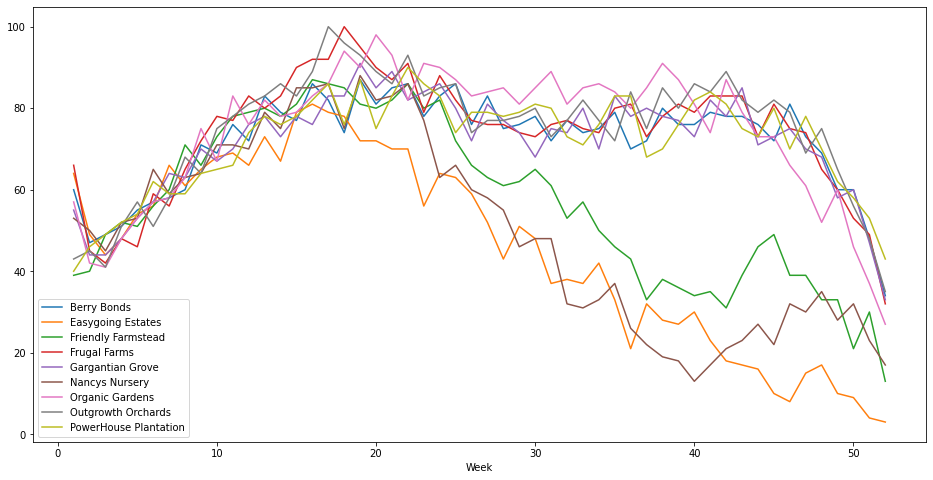

In [142]:
data.groupby(by = 'farm')['weekly yeild'].plot(figsize = (16,8), legend = True)

In [61]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220,10,as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)]=True
colormap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=colormap,linewidth=.5,annot=True,fmt=".2f",mask=dropSelf)
plt.show()